In [1]:
import pandas as pd

productos_cluster = pd.read_excel(r'/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Prueba modelos/Clusterizacion/clusterizacion_de_productos_por_ventas1.xlsx')
productos = pd.read_excel(r'/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Datos limpios/productos.xlsx')
ventas_productos = pd.read_excel (r'/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Datos limpios/ventas_productos.xlsx')

display(productos_cluster.head())
display(productos.head())
display(ventas_productos.head())

,id_producto,proporcion_promedio,cantidad_total_vendida,precio_promedio,cluster
0,",7790580178208",0.005705,1.0,23.500000,0
1,.7771501000143,0.009128,2.0,30.250000,0
2,.7772905004010,0.025334,1.0,74.000000,2
3,.7774904401753,0.001037,1.0,18.000000,0
4,0,0.041385,15.0,121.833333,2


,id_producto,nombre_producto,Precio
0,7790580343507,Arcos Delicias,36.0
1,7775602130020,BOLSAS de BASURA 65X80 Cm,8.5
2,77700005487,Crema Corporal dinazul,13.0
3,7775000009089,Detergente Ola Limon160g,3.0
4,7500435019880,Head & Shoulders Manzana Fresh,40.0


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5


In [3]:

ventas_con_cluster = ventas_productos.merge(
    productos_cluster[['id_producto', 'cluster']],  
    on='id_producto', 
    how='left'  
)

# Mostrar una vista previa de la tabla resultante
print("Vista previa de la tabla con cluster:")
display(ventas_con_cluster.head())


Vista previa de la tabla con cluster:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,cluster
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0,0.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0,1.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0,1.0
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0,0.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5,1.0


In [5]:
# Filtrar solo los registros de clusters 1 y 2 en la tabla de ventas con cluster
ventas_filtradas = ventas_con_cluster[ventas_con_cluster['cluster'].isin([1])]

# Mostrar una vista previa de los datos filtrados
print("Vista previa de las ventas filtradas (clusters 1 ):")
display(ventas_filtradas.head())
ventas_filtradas.shape

Vista previa de las ventas filtradas (clusters 1 ):


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,cluster
1,2023-08-01,1122,Arroz,2.0,240.0,480.0,1.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0,1.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5,1.0
7,2023-08-01,fideo,Fideo,2.0,57.0,114.0,1.0
9,2023-08-01,3003,Harina,3.0,55.0,165.0,1.0


(11182, 7)

In [7]:
# Encontrar los 5 productos con más historial de ventas del cluster 1
top_5_cluster_1 = ventas_filtradas[ventas_filtradas['cluster'] == 1] \
    .groupby('id_producto')['cantidad'] \
    .sum() \
    .nlargest(5) \
    .reset_index()

# Hacer merge para incluir el nombre del producto
top_5_cluster_1 = top_5_cluster_1.merge(productos[['id_producto', 'nombre_producto']], on='id_producto', how='left')

# Mostrar los resultados con el nombre del producto
print("Top 5 productos con más ventas del cluster 1:")
display(top_5_cluster_1)


Top 5 productos con más ventas del cluster 1:


,id_producto,cantidad,nombre_producto
0,3333,2225.0,Masitas
1,77852255,2173.0,Huevo
2,889,1833.0,Coca Cola 500 ml
3,7771259756392,1581.0,Chicolac Pil
4,3015,1484.5,Queso


In [9]:
print("Columnas de ventas_productos:")
print(ventas_productos.columns)

print("\nColumnas de productos_cluster:")
print(productos_cluster.columns)



Columnas de ventas_productos:
Index(['fecha', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unit',
       'total_venta'],
      dtype='object')

Columnas de productos_cluster:
Index(['id_producto', 'proporcion_promedio', 'cantidad_total_vendida',
       'precio_promedio', 'cluster'],
      dtype='object')


In [11]:
ventas_productos['fecha'] = pd.to_datetime(ventas_productos['fecha'], format='%Y%m%d')
print("Primeras filas de ventas_productos después de la conversión de fecha:")
display(ventas_productos.head())


Primeras filas de ventas_productos después de la conversión de fecha:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5


In [15]:
# Escoger un producto del top 5 del cluster 1 
id_producto = "77852255" 

# Filtrar las ventas del producto específico
ventas_producto = ventas_productos[ventas_productos['id_producto'] == id_producto]

print(f"Número de registros para el producto {id_producto}: {len(ventas_producto)}")
print("Primeras filas del historial de ventas del producto:")
display(ventas_producto.head())

Número de registros para el producto 77852255: 940
Primeras filas del historial de ventas del producto:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta
11,2023-08-01,77852255,Huevo,5.0,27.0,135.0
24,2023-08-01,77852255,Huevo,1.0,13.5,13.5
57,2023-08-01,77852255,Huevo,1.0,27.0,27.0
78,2023-08-01,77852255,Huevo,2.0,27.0,54.0
119,2023-08-01,77852255,Huevo,1.0,9.0,9.0


In [17]:
import pandas as pd

# Guardar la tabla en un archivo Excel
nombre_archivo = f"ventas_producto_huevo.xlsx"
ventas_producto.to_excel(nombre_archivo, index=False)

print(f"El archivo se ha guardado como '{nombre_archivo}' en el directorio actual.")


El archivo se ha guardado como 'ventas_producto_huevo.xlsx' en el directorio actual.


In [19]:
# Ordenar por fecha y establecer la fecha como índice
ventas_producto = ventas_producto.sort_values('fecha').set_index('fecha')

print("Primeras filas después de establecer la fecha como índice:")
display(ventas_producto.head())

Primeras filas después de establecer la fecha como índice:


,id_producto,nombre_producto,cantidad,precio_unit,total_venta
fecha,,,,,
2023-08-01,77852255,Huevo,5.0,27.0,135.0
2023-08-01,77852255,Huevo,1.0,13.5,13.5
2023-08-01,77852255,Huevo,1.0,27.0,27.0
2023-08-01,77852255,Huevo,2.0,27.0,54.0
2023-08-01,77852255,Huevo,1.0,9.0,9.0


In [21]:
# Agrupar las ventas de forma semanal e interpolar los valores faltantes
serie_ventas_semanal = ventas_producto['cantidad'].resample('W').sum().interpolate(method='linear')

# Mostrar una vista previa de la serie temporal semanal interpolada
print("Serie temporal semanal interpolada:")
print(serie_ventas_semanal.head())
print(f"Longitud de la serie temporal semanal: {len(serie_ventas_semanal)}")

Serie temporal semanal interpolada:
fecha
2023-08-06    49.0
2023-08-13    33.0
2023-08-20    47.0
2023-08-27    48.0
2023-09-03    45.0
Freq: W-SUN, Name: cantidad, dtype: float64
Longitud de la serie temporal semanal: 66


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Escalar la serie temporal semanal interpolada
scaler = MinMaxScaler()
serie_ventas_semanal_escalada = scaler.fit_transform(serie_ventas_semanal.values.reshape(-1, 1))

print("Primeros valores de la serie escalada:")
print(serie_ventas_semanal_escalada[:5])

Primeros valores de la serie escalada:
[[0.65671642]
 [0.41791045]
 [0.62686567]
 [0.64179104]
 [0.59701493]]


In [25]:
import numpy as np

# Definir el tamaño de la ventana deslizante
ventana = 6  # Usamos 6 semanas como entrada

# Crear ventanas deslizantes
X, y = [], []
for i in range(len(serie_ventas_semanal_escalada) - ventana):
    X.append(serie_ventas_semanal_escalada[i:i + ventana])
    y.append(serie_ventas_semanal_escalada[i + ventana])

# Convertir a arrays de NumPy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (60, 6, 1)
Forma de y: (60, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Definir el modelo LSTM usando Input explícitamente
modelo = Sequential([
    Input(shape=(ventana, 1)),  
    LSTM(150, activation='relu'),
    Dense(1)
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
modelo.fit(X, y, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2222
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1698 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1229 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0750 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0416 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0475  
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420  
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 
Epoch 16/200
4/4 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


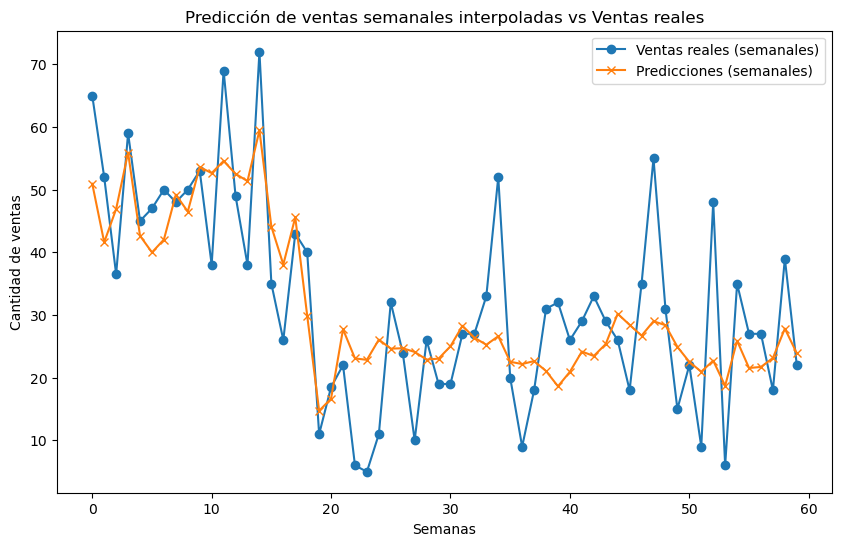

In [29]:
# Hacer predicciones para todo el conjunto de datos de entrada
predicciones_escaladas = modelo.predict(X)

# Desescalar las predicciones y los valores reales
predicciones = scaler.inverse_transform(predicciones_escaladas)
y_real = scaler.inverse_transform(y.reshape(-1, 1))

# Visualizar las predicciones vs ventas reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_real, label='Ventas reales (semanales)', marker='o')
plt.plot(predicciones, label='Predicciones (semanales)', marker='x')
plt.title("Predicción de ventas semanales interpoladas vs Ventas reales")
plt.xlabel("Semanas")
plt.ylabel("Cantidad de ventas")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE, MSE y RMSE
mae = mean_absolute_error(y_real, predicciones)
mse = mean_squared_error(y_real, predicciones)
rmse = np.sqrt(mse)

print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")

MAE (Error Absoluto Medio): 8.35
MSE (Error Cuadrático Medio): 107.02
RMSE (Raíz del Error Cuadrático Medio): 10.34


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
   ID Producto      Fecha  Predicciones futuras
0     77852255 2024-11-08             23.901989
1     77852255 2024-11-15             29.903454
2     77852255 2024-11-22             26.580460
3     77852255 2024-11-29             26.850386
4     77852255 2024-12-06             27.095783
5     77852255 2024-12-13             31.576191
6     77852255 2024-12-20             26.970396
7     77852255 2024-12-27             28.161095
8     77852255 2025-01-03             26.811932
9     77852255 2025-01-10             27.066843
10    77852255 2

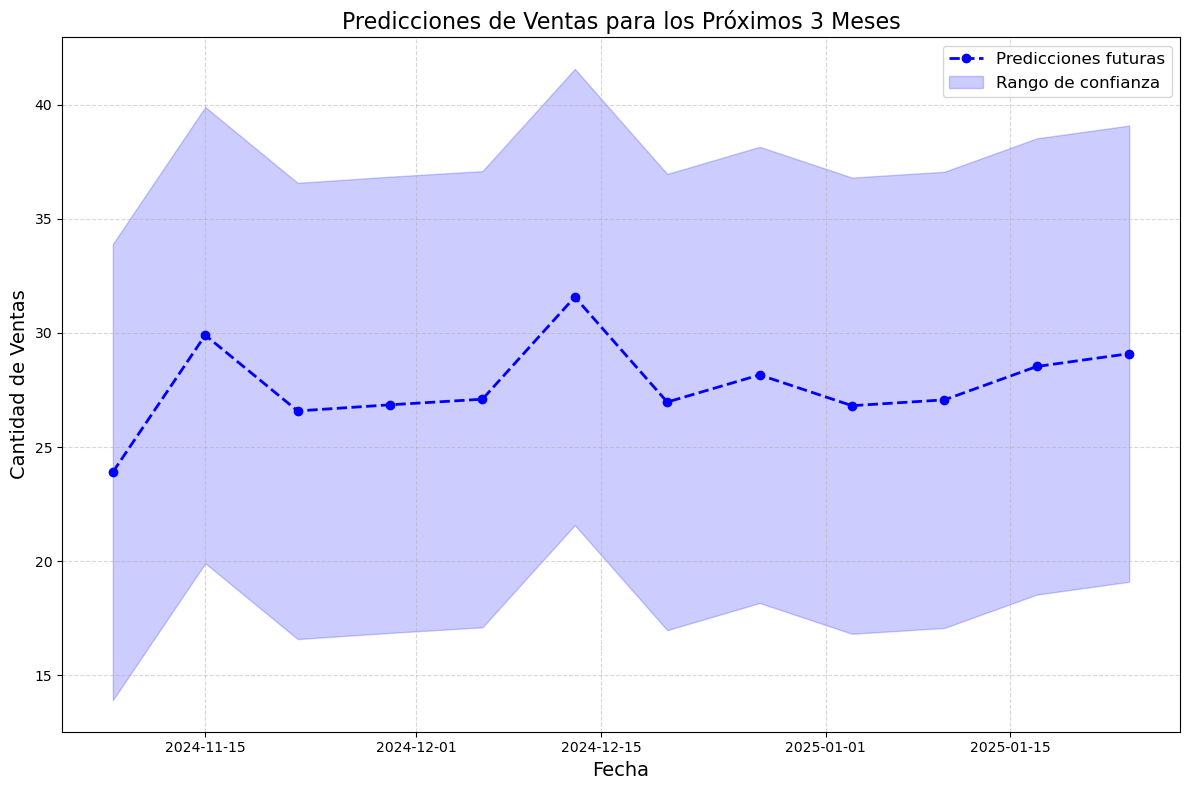

In [33]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

# Definir el número de semanas a predecir (3 meses ≈ 12 semanas)
semanas_a_predecir = 12

# Usar la última ventana del conjunto de datos como punto de partida para las predicciones futuras
ultima_ventana = X[-1].reshape(1, -1, 1)  # Tomar la última ventana y ajustar la forma

# Generar las predicciones futuras
predicciones_futuras = []
for _ in range(semanas_a_predecir):
    prediccion_escalada = modelo.predict(ultima_ventana)  # Hacer la predicción
    predicciones_futuras.append(prediccion_escalada[0][0])  # Guardar la predicción
    # Actualizar la ventana deslizante con la nueva predicción
    ultima_ventana = np.append(ultima_ventana[:, 1:, :], prediccion_escalada.reshape(1, 1, 1), axis=1)

# Desescalar las predicciones futuras
predicciones_futuras = scaler.inverse_transform(np.array(predicciones_futuras).reshape(-1, 1)).flatten()

# Crear una lista de fechas futuras a partir de la última fecha de ventas
ultima_fecha = ventas_producto.index[-1]
fechas_futuras = [ultima_fecha + timedelta(weeks=i) for i in range(1, semanas_a_predecir + 1)]

# Crear un DataFrame con las predicciones futuras e incluir el ID del producto
df_futuro = pd.DataFrame({
    'ID Producto': "77852255",  
    'Fecha': fechas_futuras,
    'Predicciones futuras': predicciones_futuras
})

# Mostrar la tabla
print(df_futuro)

# Exportar las predicciones futuras a un archivo Excel
ruta_salida = f'predicciones_{id_producto}.xlsx'
df_futuro.to_excel(ruta_salida, index=False)

# Visualizar las predicciones futuras con ajuste a la gráfica
plt.figure(figsize=(12, 8))
plt.plot(df_futuro['Fecha'], df_futuro['Predicciones futuras'], label='Predicciones futuras', marker='o', color='blue', linewidth=2, linestyle='--')
plt.fill_between(df_futuro['Fecha'], df_futuro['Predicciones futuras'] - 10, df_futuro['Predicciones futuras'] + 10, color='blue', alpha=0.2, label='Rango de confianza')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Predicciones de Ventas para los Próximos 3 Meses", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Cantidad de Ventas", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from datetime import timedelta

# Reescalar los valores reales y predichos a sus formas originales
y_real_original = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
y_predicho_original = scaler.inverse_transform(modelo.predict(X)).flatten()


fecha_inicial = ventas_producto.index[0]  
frecuencia = timedelta(weeks=1) 
fechas = [fecha_inicial + i * frecuencia for i in range(len(y_real_original))]

# Calcular la diferencia proporcional evitando división por cero
diferencia_proporcional = [
    ((pred - real) / real * 100) if real != 0 else None
    for pred, real in zip(y_predicho_original, y_real_original)
]

# Crear un DataFrame para la comparación
df_comparacion = pd.DataFrame({
    'Fecha': fechas,
    'Valores Reales': y_real_original,
    'Valores Predichos': y_predicho_original,
    'Diferencia Proporcional (%)': diferencia_proporcional
})

# Redondear los valores a dos decimales para mayor claridad
df_comparacion = df_comparacion.round(2)

# Mostrar la tabla
display(df_comparacion)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Fecha,Valores Reales,Valores Predichos,Diferencia Proporcional (%)
0,2023-08-01,65.0,50.939999,-21.64
1,2023-08-08,52.0,41.610001,-19.99
2,2023-08-15,36.5,46.910000,28.53
3,2023-08-22,59.0,55.919998,-5.23
4,2023-08-29,45.0,42.639999,-5.25
5,2023-09-05,47.0,39.990002,-14.92
6,2023-09-12,50.0,42.040001,-15.92
7,2023-09-19,48.0,49.189999,2.49
8,2023-09-26,50.0,46.500000,-7.00
9,2023-10-03,53.0,53.610001,1.14
